# Zomato 
sales analysis review #data set downoded from from Kaggle

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

we have to import basic librarys as mentioned above

In [2]:
#Let's start with loading the data set using Pandas library , this is a .csv file
data = pd.read_csv("C:\\Users\\Ravi Nadageri\\Documents\\Zomatodataset\\zomato.csv",encoding='latin-1')

In [3]:
# This is additional file having the country names which will be usufull 
data_country = pd.read_excel("C:\\Users\\Ravi Nadageri\\Documents\\Zomatodataset\\Country-Code.xlsx")


In [4]:
#we can merge the both file using common name of column which is 'Country Code' 

df = pd.merge(data, data_country,on='Country Code',how='left')

In [5]:
# Let's see the few first rows of data set using the .head() method same we can use .tail()
df.head(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines


In [7]:
# Now once we load the data then we have to check the data quality, check for any null or NAN value

df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
Country                 0
dtype: int64

Based on above look like the data is having good quality, except the column 'Cuisines' having 9 counts of NULL

In [8]:
# so we have a total 9551 rows of data and 22 column, using info() method we can see the Dtype and counts

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9551 entries, 0 to 9550
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [9]:
# the describe method gives us a Percentile of each columns

df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


# In Data Analysis What All Things We Do here are listed below

Find Missing Values

Explore About the Numerical Variables

Explore About categorical Variables

Finding Relationship between features

In [11]:
df.shape #we can check the data set shape

(9551, 22)

In [12]:
df.isna().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
Country                 0
dtype: int64

In [13]:
# There are many way to find the null column name by below

#[i for i in df.columns if df[i].isnull().sum()>0]
m = (i for i in df.columns if df[i].isnull().sum()>0)
list(m)

['Cuisines']

So it is cleare, we have only one column which having a NAN data.

Text(0.5, 1.0, 'Null chart data')

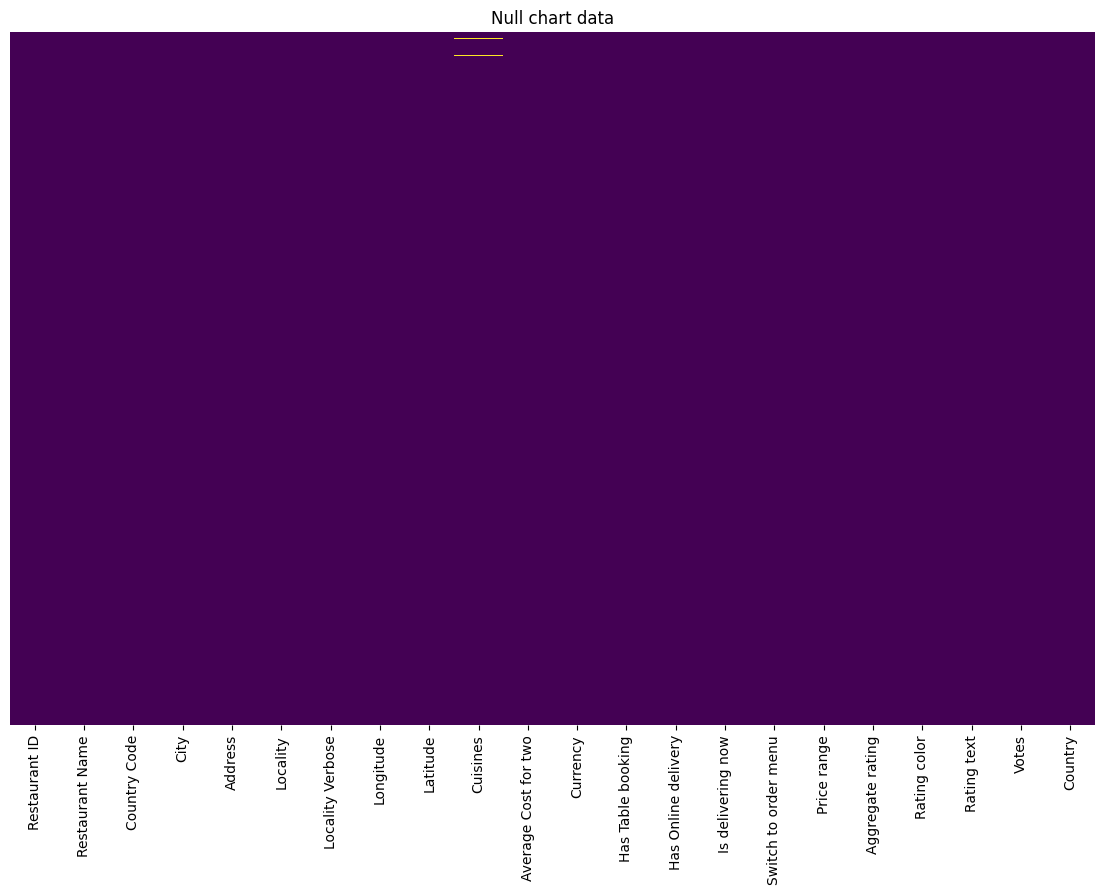

In [14]:
#The null value can also be visualize by the heatmap chart

plt.figure(figsize = (14,9)) #chart size

sns.heatmap(df.isnull(),yticklabels=False, cbar=False, cmap='viridis')

plt.title("Null chart data")

In [15]:
# Top 5 Country we can check using value counts which will give us data counts wr to contry name. 

df['Country'].value_counts()[:5] 

India             8652
United States      434
United Kingdom      80
Brazil              60
UAE                 60
Name: Country, dtype: int64

# The largest order placed on Zomato by which country ?

In [22]:
# we can represent the largest country using Pie chart so we need a Value and its Label name's, 
#so let's prepare the  vlues and Label name

country_name = df.Country.value_counts().index

print(country_name)

Index(['India', 'United States', 'United Kingdom', 'Brazil', 'UAE',
       'South Africa', 'New Zealand', 'Turkey', 'Australia', 'Phillipines',
       'Indonesia', 'Singapore', 'Qatar', 'Sri Lanka', 'Canada'],
      dtype='object')


In [21]:
# using the .values() we can get the counts 

country_value = df.Country.value_counts().values

print(country_value)

[8652  434   80   60   60   60   40   34   24   22   21   20   20   20
    4]


So we are ready for PIE Plot via Label name and values so lets plot Pie through Matplotlib

([<matplotlib.patches.Wedge at 0x25f8bdd8cd0>,
 [Text(-1.0829742700952103, 0.19278674827836725, 'India'),
  Text(1.077281715838356, -0.22240527134123297, 'United States'),
  Text(1.0995865153823035, -0.03015783794312073, 'United Kingdom')],
 [Text(-0.590713238233751, 0.10515640815183668, '94.39%'),
  Text(0.5876082086391032, -0.12131196618612707, '4.73%'),
  Text(0.5997744629358018, -0.01644972978715676, '0.87%')])

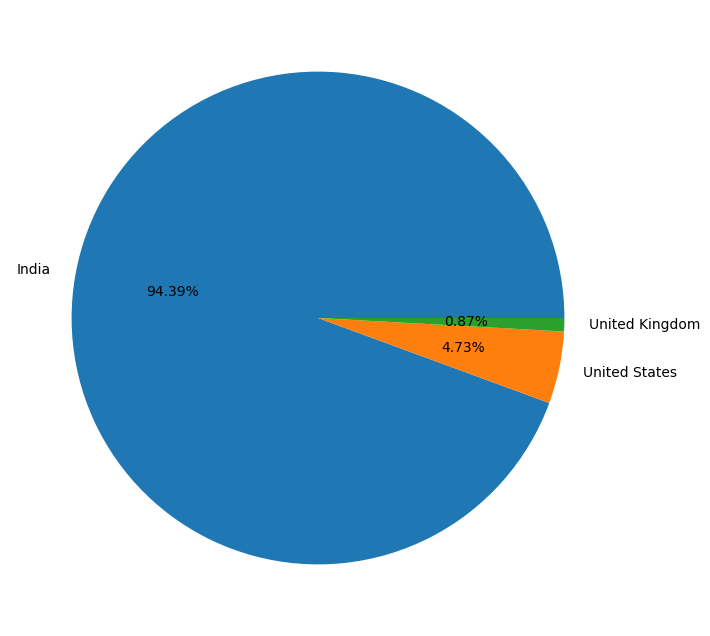

In [24]:
import matplotlib

matplotlib.rcParams['figure.figsize'] = (16, 8)

plt.pie(country_value[:3],labels=country_name[:3],autopct='%1.2f%%')

#Lets try with top 3 contry so that is why we used the Index[:3] and autopct='%1.2f%%' this will help to get the % numbers up to 2 decimal

# Looklike the India was most valuable customer as a largest country which has the rank 1 and others are UK and US.

In [54]:
df.columns.value_counts()

Restaurant ID           1
Restaurant Name         1
Votes                   1
Rating text             1
Rating color            1
Aggregate rating        1
Price range             1
Switch to order menu    1
Is delivering now       1
Has Online delivery     1
Has Table booking       1
Currency                1
Average Cost for two    1
Cuisines                1
Latitude                1
Longitude               1
Locality Verbose        1
Locality                1
Address                 1
City                    1
Country Code            1
Country                 1
dtype: int64

We have a lot of information on the review side lets review them, Rating , colur and via text column

In [30]:
# we can use the GroupBy fuction to get the counts by Group
# Using reset_index() we can get a new index and finally for the last coulmn we rename it as Rating count
ratings_df= df.groupby(['Aggregate rating', 'Rating color','Rating text']).size().reset_index()

print(ratings_df.head())

ratings_df = ratings_df.rename(columns={0:'Rating Count'}) #update column name

ratings_df.head()

   Aggregate rating Rating color Rating text     0
0               0.0        White   Not rated  2148
1               1.8          Red        Poor     1
2               1.9          Red        Poor     2
3               2.0          Red        Poor     7
4               2.1          Red        Poor    15


,Aggregate rating,Rating color,Rating text,Rating Count
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15


<AxesSubplot:xlabel='Aggregate rating', ylabel='Rating Count'>

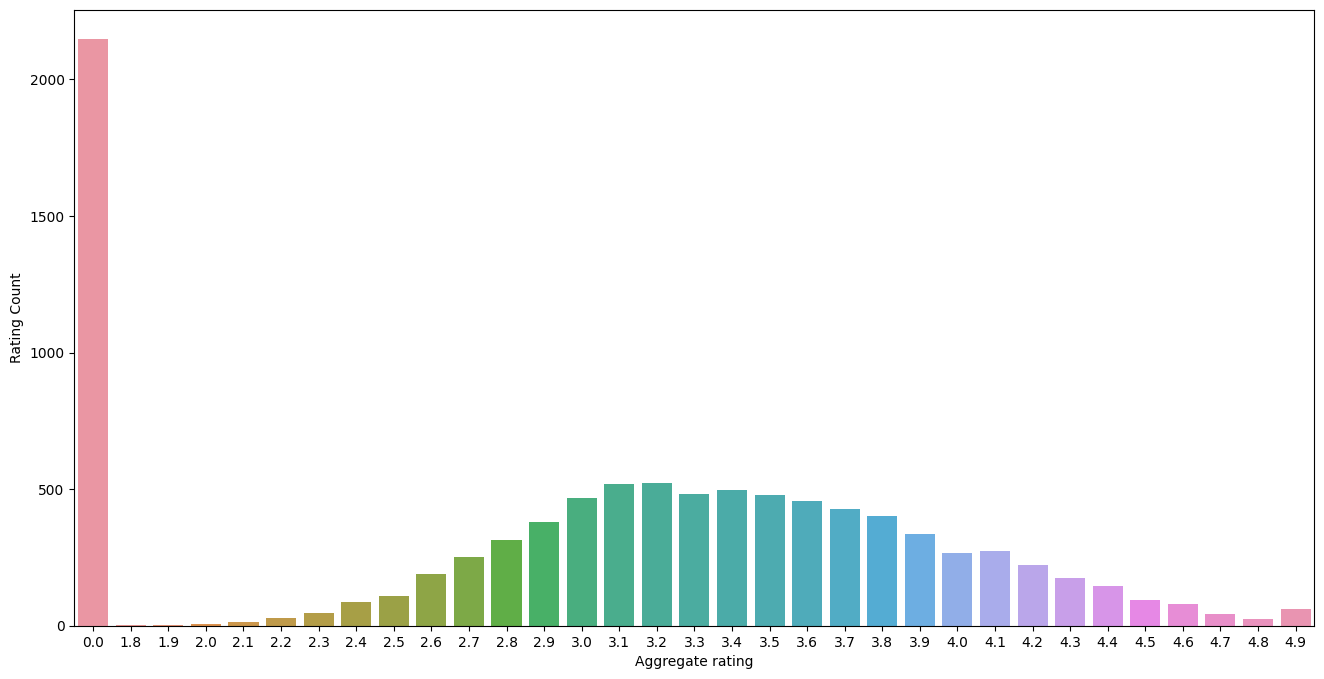

In [68]:
#lets plot the Bar plot for Aggregate rating on x axis  vs Rating counts on Y axis

sns.barplot(x='Aggregate rating',y='Rating Count',data=ratings_df)

#Usually we dont need to name the axis a SNS will take care of that


<AxesSubplot:xlabel='Aggregate rating', ylabel='Rating Count'>

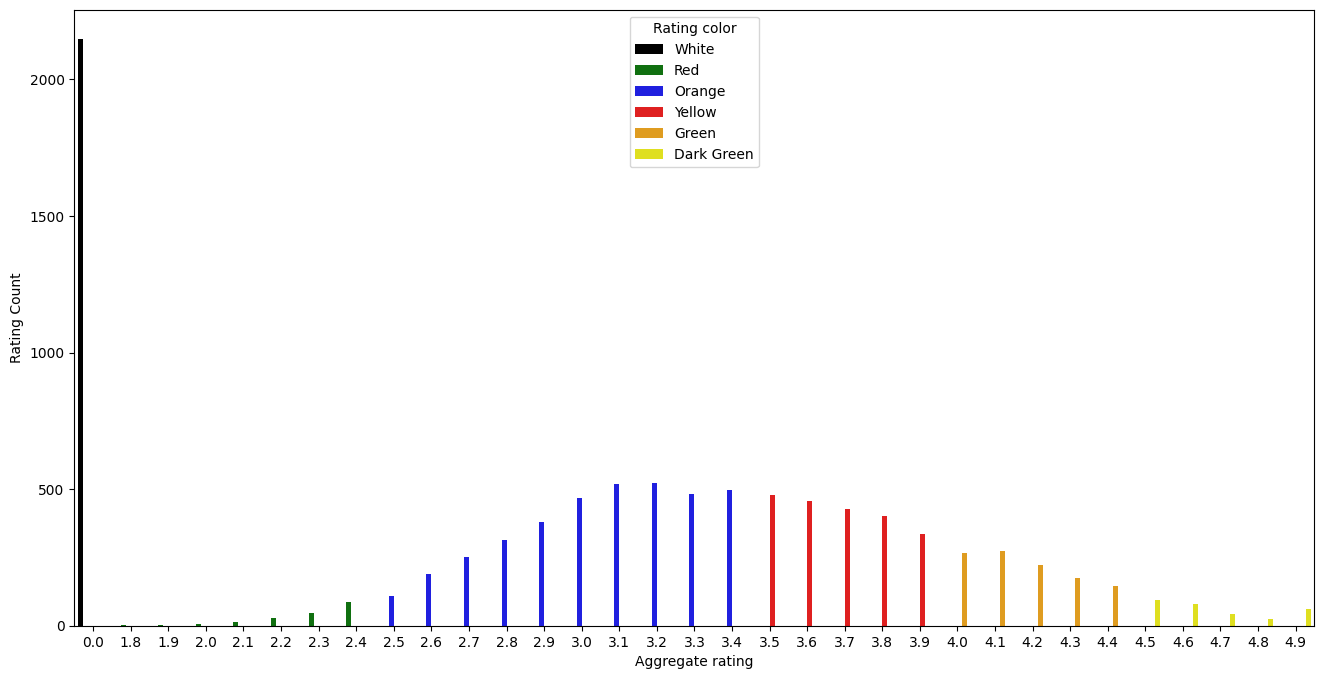

In [31]:
# Now above we had already plotted the Bar plot now make some visual change by using Palette to color code changes 
# one more thing we can add the Hue which allow to add one more paramter in chart


sns.barplot(x='Aggregate rating',y='Rating Count',data= ratings_df, hue='Rating color',palette=['black','green','blue','red','orange','yellow'])

<AxesSubplot:xlabel='Rating color', ylabel='count'>

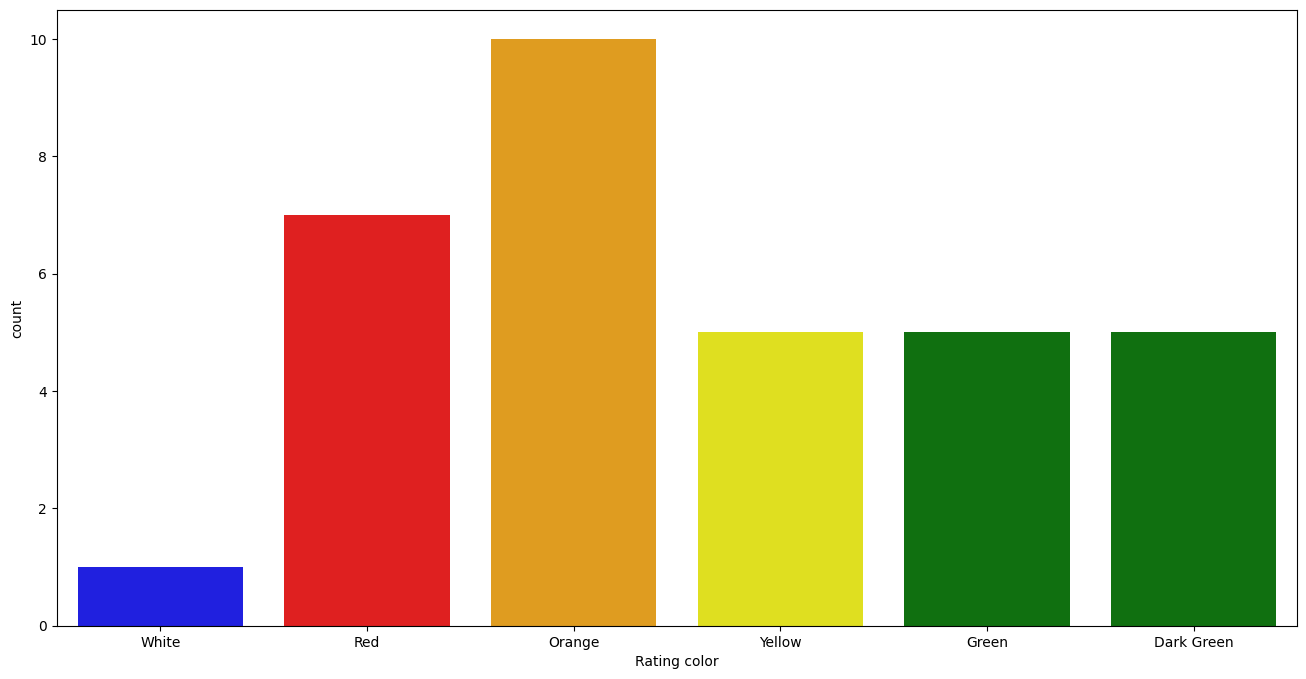

In [70]:
# Below is the Count plot for same data set and for Rating color parameter
sns.countplot(x="Rating color",data=ratings_df,palette=['blue','red','orange','yellow','green','green'])

# Lets find the 0 rating given by which country ? at what contribution ?

In [39]:
# Lets check the different Rating color iteams

ratings_df['Rating color'].value_counts()

Orange        10
Red            7
Yellow         5
Green          5
Dark Green     5
White          1
Name: Rating color, dtype: int64

In [40]:
# so white color is for '0' rating so lets find our the country who has the 0 rating by Group by function for Country

df[df['Rating color']=='White'].groupby('Country').size().reset_index()

,Country,0
0,Brazil,5
1,India,2139
2,United Kingdom,1
3,United States,3


In [51]:
# Lets do the same above thing by different method just for info

zero_rating = df.groupby(['Aggregate rating','Country']).size().head().reset_index().rename(columns={0:'Rating Count'})

zero_rating.head()

,Aggregate rating,Country,Rating Count
0,0.0,Brazil,5
1,0.0,India,2139
2,0.0,United Kingdom,1
3,0.0,United States,3
4,1.8,India,1


([<matplotlib.patches.Wedge at 0x25f9bcf37c0>,
 [Text(1.0999706148652841, 0.008040300547172396, 'Brazil'),
  Text(-1.0999999999999999, 2.5747358557800545e-08, 'India'),
  Text(1.099904792435017, -0.014472303841553744, 'United Kingdom'),
  Text(1.0999706144888894, -0.008040352040513756, 'United States'),
  Text(1.0999988245143657, -0.001608125310357228, 'India')],
 [Text(0.5999839717447004, 0.004385618480275852, '0.23%'),
  Text(-0.5999999999999999, 1.4044013758800295e-08, '99.53%'),
  Text(0.5999480686009183, -0.007893983913574768, '0.05%'),
  Text(0.5999839715393941, -0.004385646567552958, '0.14%'),
  Text(0.5999993588260176, -0.0008771592601948515, '0.05%')])

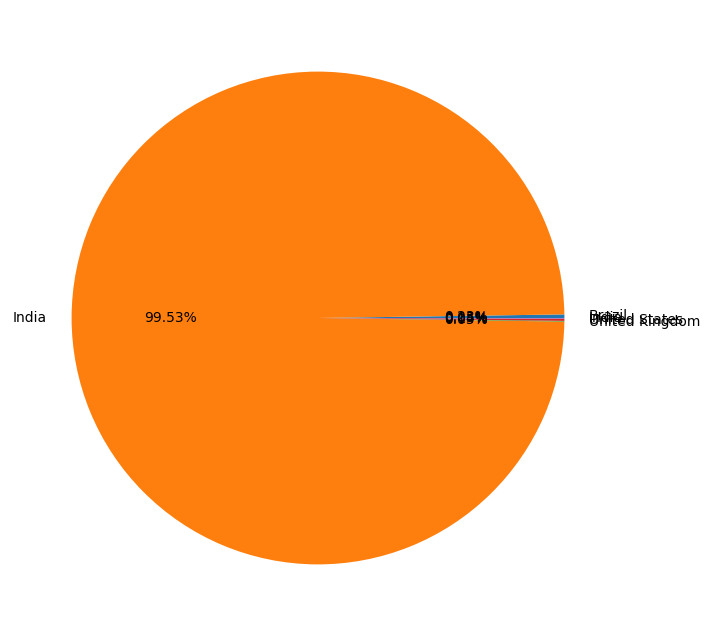

In [59]:
#sns.barplot(x=zero_rating['Country'],y=zero_rating['Rating Count'])
plt.pie(x=zero_rating['Rating Count'],labels=zero_rating['Country'],autopct='%1.2f%%')

# find out which currency is used by which country?

In [60]:
#lets what are the column we have to find out the currency , so we can use the Currency column
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [61]:
#s using Group by we can take a look on country and currency data

df.groupby(['Country','Currency']).size().reset_index()


,Country,Currency,0
0,Australia,Dollar($),24
1,Brazil,Brazilian Real(R$),60
2,Canada,Dollar($),4
3,India,Indian Rupees(Rs.),8652
4,Indonesia,Indonesian Rupiah(IDR),21
5,New Zealand,NewZealand($),40
6,Phillipines,Botswana Pula(P),22
7,Qatar,Qatari Rial(QR),20
8,Singapore,Dollar($),20
9,South Africa,Rand(R),60


# Which Countries do have online deliveries option?

In [62]:

df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [63]:
# Lets check the data using group by on country

df.groupby(['Has Online delivery','Country']).size().reset_index()

,Has Online delivery,Country,0
0,No,Australia,24
1,No,Brazil,60
2,No,Canada,4
3,No,India,6229
4,No,Indonesia,21
5,No,New Zealand,40
6,No,Phillipines,22
7,No,Qatar,20
8,No,Singapore,20
9,No,South Africa,60


Only India and UAE country has the online delivery facility and rest of all country are yet to take this facility

# Create a pie chart for top 5 cities distribution

In [64]:
#check data
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [65]:
cityname=df['City'].value_counts().index
cityvalue=df['City'].value_counts().values

([<matplotlib.patches.Wedge at 0x25f9b798550>,
 [Text(-0.6145352824185932, 0.9123301960708633, 'New Delhi'),
  Text(0.0623675251198054, -1.0982305276263407, 'Gurgaon'),
  Text(0.8789045225625368, -0.6614581167535246, 'Noida'),
  Text(1.0922218418223437, -0.13058119407559224, 'Faridabad'),
  Text(1.099946280005612, -0.010871113182029924, 'Ghaziabad')],
 [Text(-0.3352010631374145, 0.497634652402289, '68.87%'),
  Text(0.0340186500653484, -0.5990348332507311, '14.07%'),
  Text(0.47940246685229276, -0.36079533641101336, '13.59%'),
  Text(0.5957573682667329, -0.07122610585941394, '3.16%'),
  Text(0.5999706981848791, -0.005929698099289049, '0.31%')])

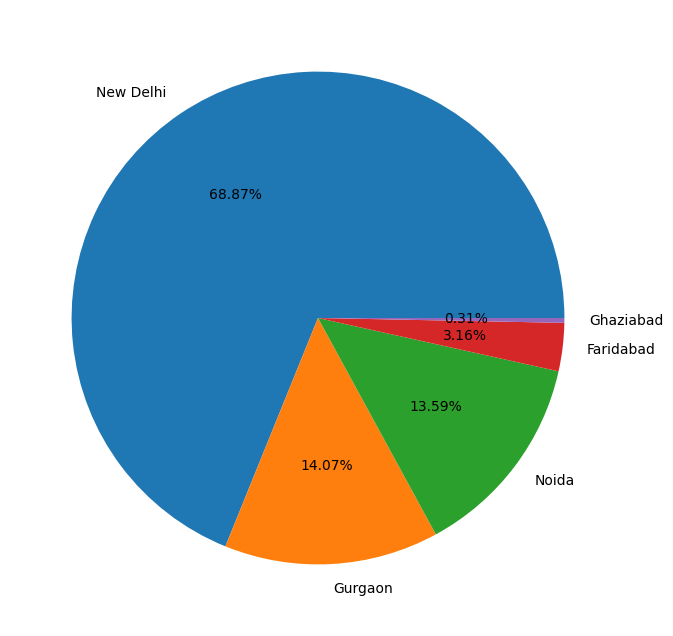

In [67]:
#Now we know that for Pie chart we have to need a values and labels so we already get that info on above so lets 
# prepare a PIE chart for top 5 City

plt.pie(cityvalue[:5],labels=cityname[:5],autopct='%1.2f%%')

# Find the top 10 cuisines ?

<AxesSubplot:>

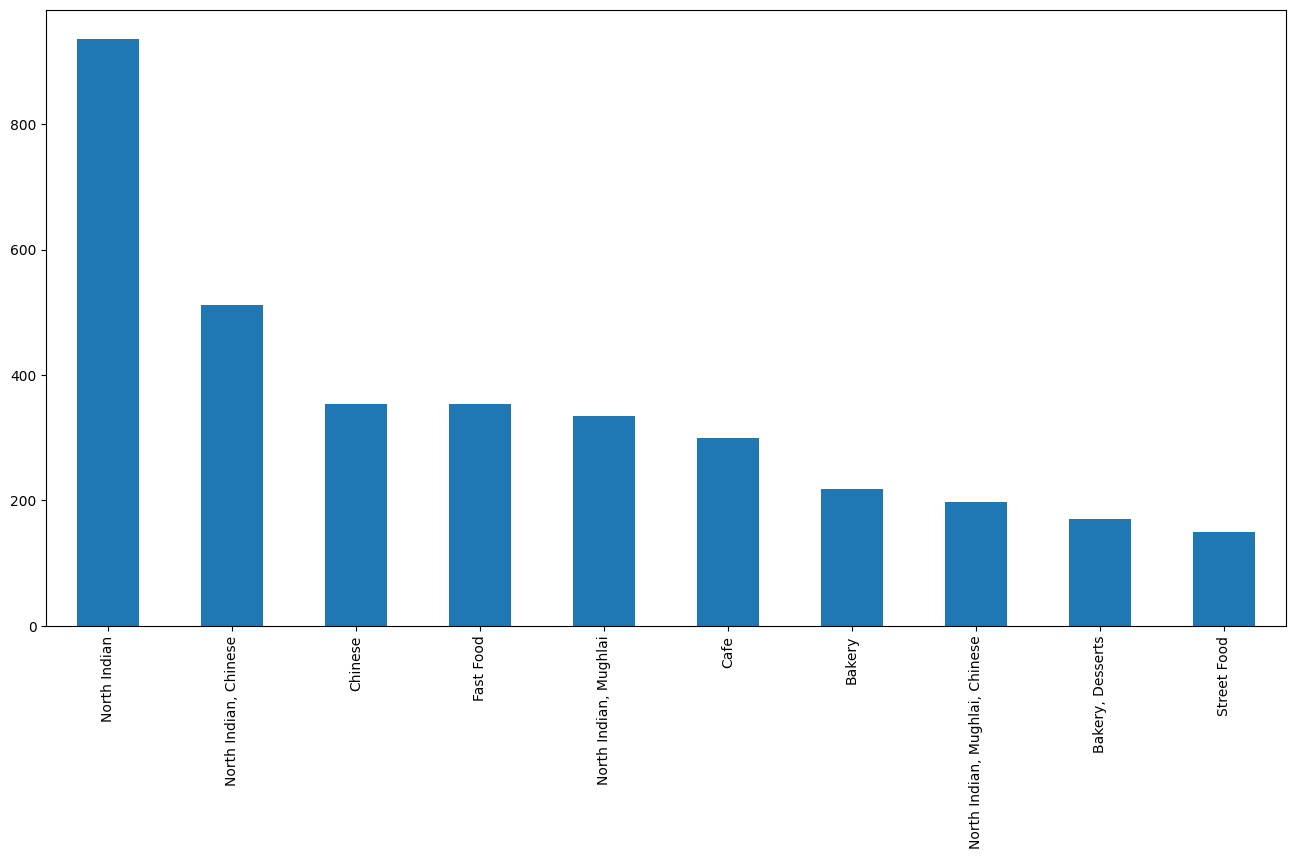

In [71]:
#Lets Find the top 10 cuisines itis the list of menu of resurents, we can do it on simple way 
cuisines_name=df['Cuisines']
cuisines_name.value_counts().head(10).plot(kind='bar')

In [100]:
#If we see carefully there are Multiple items in single inout like "French, Japanese, Desserts" so we have use some different way to get the real numbers
df['Cuisines']

0             French, Japanese, Desserts
1                               Japanese
2       Seafood, Asian, Filipino, Indian
3                        Japanese, Sushi
4                       Japanese, Korean
                      ...               
9546                             Turkish
9547     World Cuisine, Patisserie, Cafe
9548              Italian, World Cuisine
9549                     Restaurant Cafe
9550                                Cafe
Name: Cuisines, Length: 9551, dtype: object

In [102]:
def splitcol(word):
    if len(word)>1:
        word.split(',')
    else:
        return word

In [106]:
df['Cuisines_list'] = df['Cuisines'].apply(lambda x: str(x).split(',')) #create new column and split the cuisines

df['Cuisine_count'] = df['Cuisines_list'].apply(lambda x: len(x)) #get the count in new column
print(df['Cuisine_count'])
df['Cuisines_list']

0       3
1       1
2       4
3       2
4       2
       ..
9546    1
9547    3
9548    2
9549    1
9550    1
Name: Cuisine_count, Length: 9551, dtype: int64


0              [French,  Japanese,  Desserts]
1                                  [Japanese]
2       [Seafood,  Asian,  Filipino,  Indian]
3                          [Japanese,  Sushi]
4                         [Japanese,  Korean]
                        ...                  
9546                                [Turkish]
9547      [World Cuisine,  Patisserie,  Cafe]
9548                [Italian,  World Cuisine]
9549                        [Restaurant Cafe]
9550                                   [Cafe]
Name: Cuisines_list, Length: 9551, dtype: object

In [115]:
df['top_cuisine'] = df['Cuisines_list'].apply(lambda x: x[0]) #using indexing we are taking the first index from the Cuisines_list

df['top_cuisine'].value_counts()[:5]

North Indian    2992
Chinese          855
Fast Food        672
Bakery           621
Cafe             617
Name: top_cuisine, dtype: int64

<AxesSubplot:>

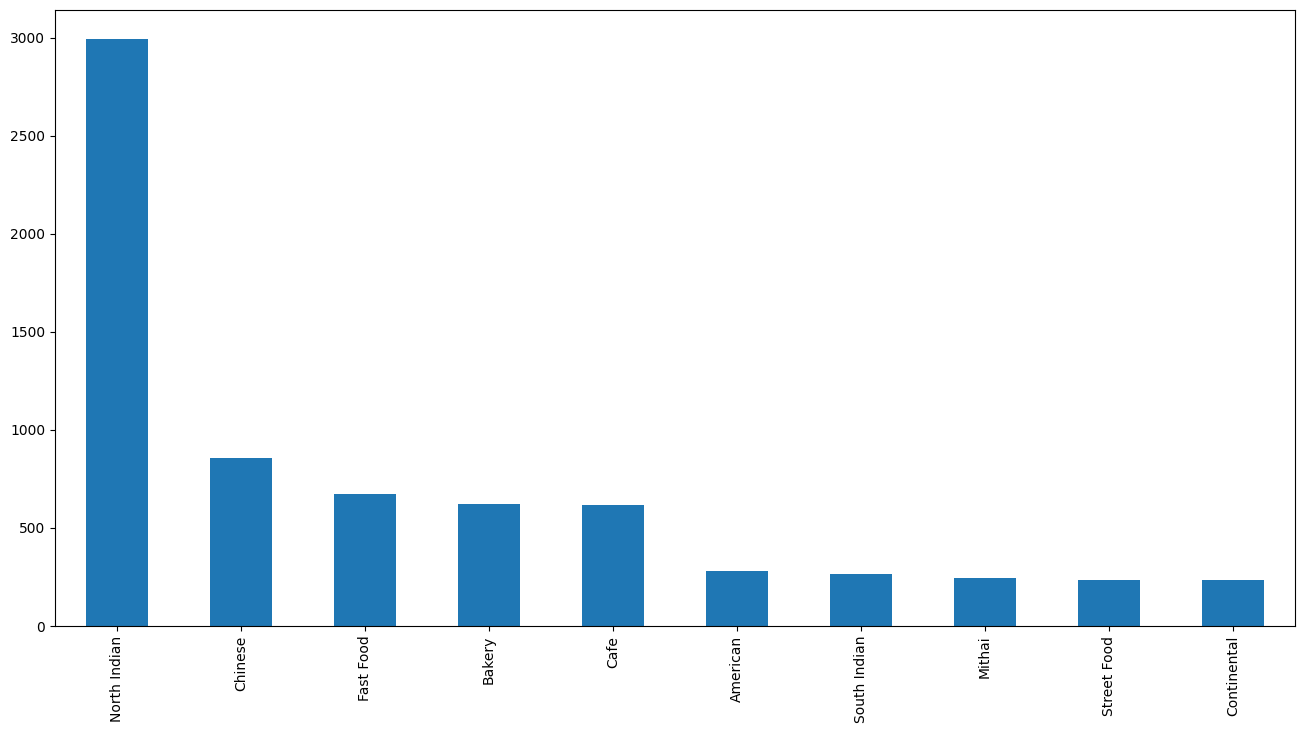

In [58]:
#Find the top 10 cuisines
name=df['top_cuisine']
name.value_counts().head(10).plot(kind='bar')

In [77]:
all_list_cuisine = df['Cuisines_list'].values
all_list_cuisine

array([list(['French', ' Japanese', ' Desserts']), list(['Japanese']),
       list(['Seafood', ' Asian', ' Filipino', ' Indian']), ...,
       list(['Italian', ' World Cuisine']), list(['Restaurant Cafe']),
       list(['Cafe'])], dtype=object)

In [79]:
all_cuisines = set()
for list_val in all_list_cuisine:
    for val in list_val:
        all_cuisines.add(val)

In [119]:
len(all_cuisines)

250

In [120]:
cuisine_counter = dict()
for val in all_cuisines:
    cuisine_counter[val] = 0
for list_val in all_list_cuisine:
    for val in list_val:
        cuisine_counter[val] += 1

In [122]:
new_df = pd.DataFrame(cuisine_counter, index = ['cuisine_counter'])

print(new_df.head())

new_df = new_df.T


new_df = new_df.sort_values('cuisine_counter', ascending = False)


top_cuisine = new_df.iloc[:10,:]

                 Andhra  Italian   Arabian   Desserts  American   Malaysian  \
cuisine_counter       3      234        23        503       278          16   

                  Bakery  Awadhi  German   Scottish  ...   International  \
cuisine_counter      124       5       4          2  ...               8   

                  Assamese  Turkish Pizza  Chinese   Turkish Pizza  Parsi  \
cuisine_counter          1              1      855               7      6   

                 Pub Food   Steak   Korean   Cantonese  
cuisine_counter         1      49       12           2  

[1 rows x 250 columns]


In [123]:
top_cuisine.index

Index(['North Indian', ' Chinese', ' Fast Food', ' North Indian', 'Chinese',
       ' Mughlai', 'Fast Food', 'Bakery', 'Cafe', ' Italian'],
      dtype='object')

In [92]:
df[["Cuisines"]].groupby(["Cuisines"]).size().reset_index().sort_values(by=0,ascending=False).rename(columns={0:'counts'})

,Cuisines,counts
1306,North Indian,936
1329,"North Indian, Chinese",511
497,Chinese,354
828,Fast Food,354
1514,"North Indian, Mughlai",334
...,...,...
698,"Continental, Italian, North Indian, Lebanese, ...",1
697,"Continental, Italian, North Indian, Lebanese",1
696,"Continental, Italian, North Indian, Chinese, L...",1
695,"Continental, Italian, North Indian, Chinese",1


In [127]:
top_cuisine.unstack()

cuisine_counter  North Indian     2992
                  Chinese         1880
                  Fast Food       1314
                  North Indian     968
                 Chinese           855
                  Mughlai          780
                 Fast Food         672
                 Bakery            621
                 Cafe              617
                  Italian          530
dtype: int64

So finally we have our top10 coisine plot as shown below

<AxesSubplot:>

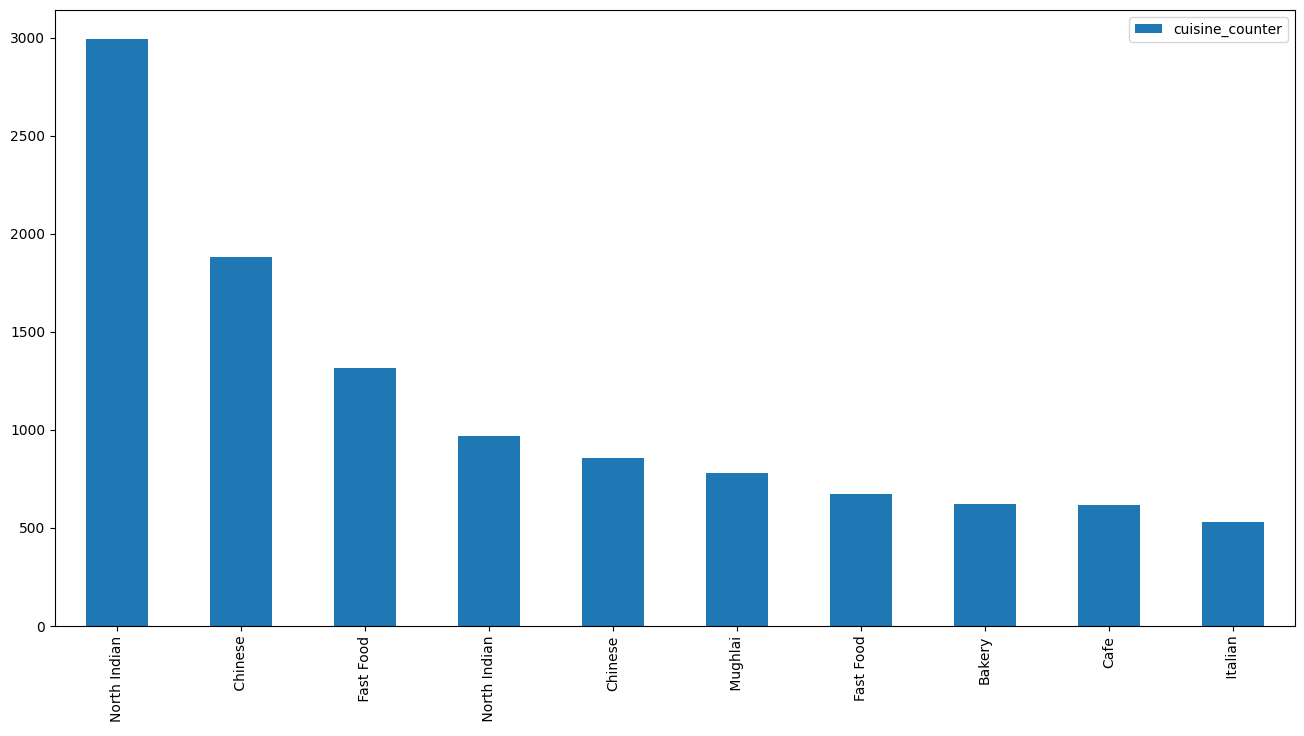

In [128]:
top_cuisine.plot.bar()